    Homework 10: Self-Organizing Maps  (SOM)
    AMRUTHA KANAKATTE RAVISHANKAR
    CWID :20027346

In [1]:
#Import the required libraries
from minisom import MiniSom
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# Load the dataset
df = pd.read_csv("wisc_bc_ContinuousVar.csv")

In [3]:
# Handling the missing values
df = df.dropna()

In [4]:
# Assigning the target and features columns
target = df['diagnosis']
features = df.drop(['diagnosis'], axis=1)  

In [5]:
# Normalizing using Min-Max scaling
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

In [6]:
# Determine the map size 
n_samples = features_scaled.shape[0]
map_size = 5 * math.sqrt(n_samples)  
map_height = map_width = math.ceil(math.sqrt(map_size)) 

In [7]:
print(f"Number of samples: {n_samples}")
print(f"(map_height, map_width) = ({map_height}, {map_width})")
print(f"Number of features: {features_scaled.shape[1]}")

Number of samples: 569
(map_height, map_width) = (11, 11)
Number of features: 31


In [8]:
# Initialize the SOM
sigma = 1.5  
lr = 0.5    
som = MiniSom(x=map_height, y=map_width, input_len=features_scaled.shape[1], sigma=sigma, learning_rate=lr, 
              neighborhood_function='gaussian', random_seed=123)

In [9]:
# Initialize weights using PCA
som.pca_weights_init(features_scaled)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/minisom.py:447: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


In [10]:
# Train the SOM with the given data for 1000 iterations
som.train(data=features_scaled, num_iteration=1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.3363400704161112


In [11]:
# Cluster labels for each data point 
cluster_labels = [som.winner(x) for x in features_scaled]
cluster_labels = [label[0] * map_width + label[1] for label in cluster_labels]

In [12]:
# Add cluster labels to the data
df['cluster'] = cluster_labels

In [13]:
# Table with diagnosis and corresponding cluster
result = pd.concat([df['diagnosis'], df['cluster']], axis=1)

In [14]:
print(result.head())

  diagnosis  cluster
0         M      106
1         M       64
2         M       95
3         M       90
4         M       74


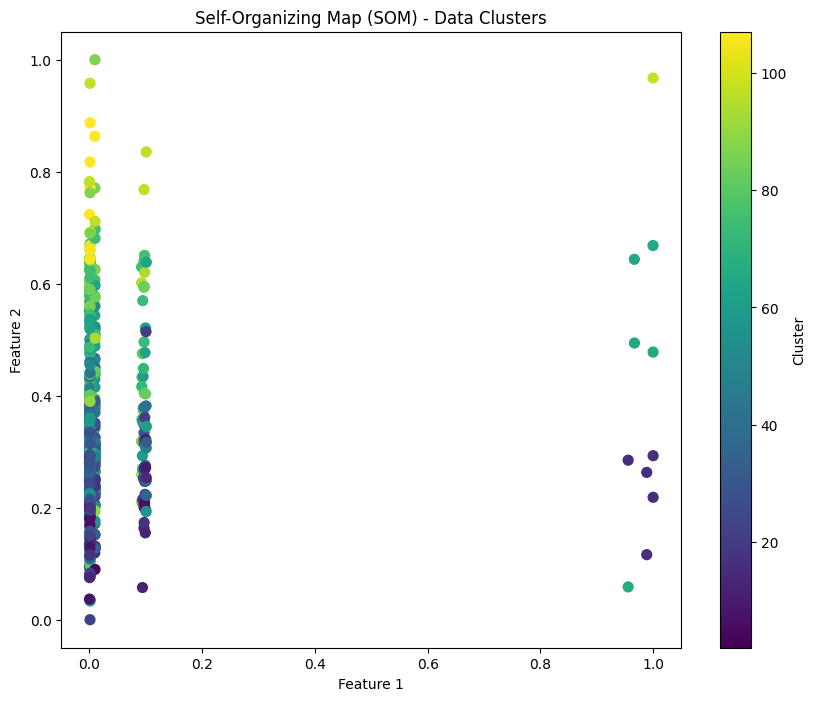

In [15]:
# Visualizing the results

x_coords = np.arange(map_height)
y_coords = np.arange(map_width)
plt.figure(figsize=(10, 8))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=cluster_labels, cmap='viridis', marker='o', s=50)
plt.colorbar(label='Cluster')

plt.title("Self-Organizing Map (SOM) - Data Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()

In [19]:
# Map string labels to integers if necessary
unique_labels = list(set(target))  
label_to_int = {label: idx for idx, label in enumerate(unique_labels)} 
target_mapped = [label_to_int[label] for label in target]  

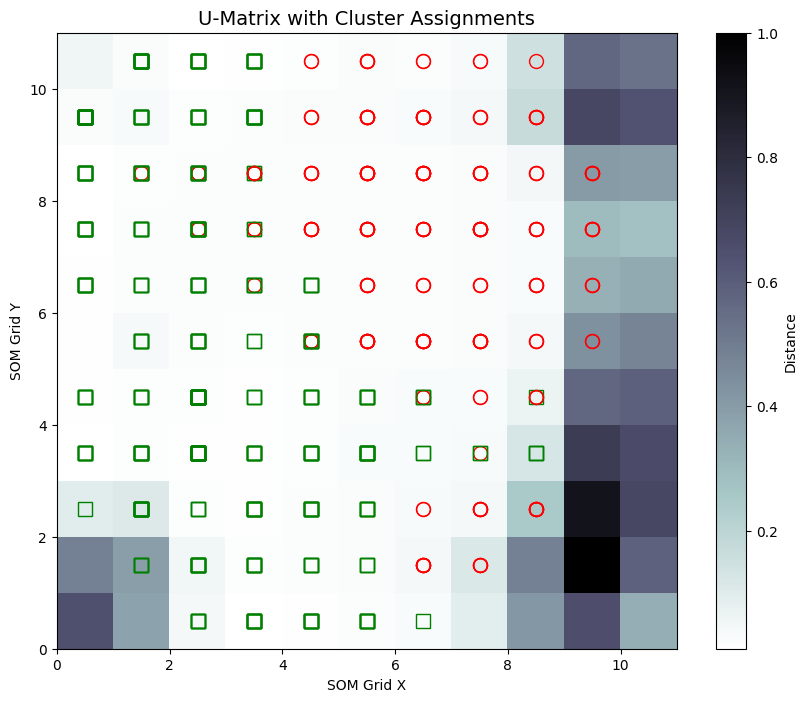

In [21]:
# Plot the U-Matrix
plt.figure(figsize=(10, 8))

#  U-Matrix
u_matrix = som.distance_map().T
plt.pcolor(u_matrix, cmap='bone_r')
plt.colorbar(label='Distance')

# Define markers and colors for different classes
markers = ['o', 's', '^']  
colors = ['r', 'g', 'b']

# Plot the data points on the U-Matrix
for i, (feature, label) in enumerate(zip(features_scaled, target_mapped)):
    w = som.winner(feature)  
    plt.plot(
        w[0] + 0.5, w[1] + 0.5,  
        markers[label],          
        markeredgecolor=colors[label],
        markerfacecolor='None',  
        markersize=10,
        markeredgewidth=1
    )

plt.title("U-Matrix with Cluster Assignments", fontsize=14)
plt.xlabel("SOM Grid X")
plt.ylabel("SOM Grid Y")
plt.show()
